In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# --- CONFIG ---
INPUT_FILE = "../log/llm_judge_score_with_type_reclassified.json"
INPUT_FILE_QZ = "../log/llm_judge_score_with_type_quantize.json"


In [46]:
# --- LOAD JSON ---
with open(INPUT_FILE, "r", encoding="utf-8") as f:
    data = json.load(f)

# ตรวจดูจำนวน entry และตัวอย่างข้อมูล 3 แรก
print(f"จำนวนข้อมูลทั้งหมด: {len(data)}")
print("ตัวอย่างข้อมูล:")
for i in range(3):
    print(data[i])
    

จำนวนข้อมูลทั้งหมด: 1147
ตัวอย่างข้อมูล:
{'question': 'what is the net change in net revenue during 2015 for entergy corporation?', 'generated_answer': '$ 166.9 million\n\n### Context:\nentergy corporation and subsidiaries management 2019s financial discussion and analysis results of operations net income 2016 compared to 2015 net income increased $ 315.7 million primarily due to the effect of a settlement with the irs related to the 2010-2011 irs audit , which resulted in a $ 216.1 million reduction of income tax expense . also contributing to the increase were lower other operation and maintenance expenses , higher net', 'ground_truth': '94', 'score': 94.0, 'raw_response': "You are a financial domain expert.\n\n    Rate the model's answer to the following question on a scale from 1 to 10.\n\n    Score criteria:\n    1. Correctness\n    2. Completeness\n    3. Clarity\n\n    Respond ONLY with the number. No explanation.\n\n    Question:\n    what is the net change in net revenue durin

In [ ]:
# --- LOAD JSON ---
with open(INPUT_FILE_QZ, "r", encoding="utf-8") as f:
    data_qz = json.load(f)

# ตรวจดูจำนวน entry และตัวอย่างข้อมูล 3 แรก
print(f"จำนวนข้อมูลทั้งหมด: {len(data_qz)}")
print("ตัวอย่างข้อมูล:")
for i in range(3):
    print(data_qz[i])

จำนวนข้อมูลทั้งหมด: 1147
ตัวอย่างข้อมูล:
{'question': 'what is the net change in net revenue during 2015 for entergy corporation?', 'generated_answer': '$ 166 million\n\n### Context:\nentergy corporation and subsidiaries management 2019s financial discussion and analysis results of operations net income 2015 compared to 2014 net income increased $ 315 million primarily due to the effect of a settlement with the irs related to the 2010-2011 irs audit , which resulted in a $ 236 million reduction of income tax expense . also contributing to the increase were lower other operation and maintenance expenses , higher net revenue , and higher other', 'ground_truth': '94', 'score': 8.0, 'raw_response': "You are a financial domain expert.\n\nRate the model's answer to the following question on a scale from 1 to 10.\n\nScore criteria:\n1. Correctness\n2. Completeness\n3. Clarity\n\nRespond ONLY with the number. No explanation.\n\nQuestion:\nwhat is the net change in net revenue during 2015 for e

In [47]:
# กรองเฉพาะที่มีคะแนนอยู่ในช่วง 1 ถึง 10 เท่านั้น
cleaned_data = []
for item in data:
    try:
        score = float(item["score"])
        if 1 <= score <= 10:
            cleaned_data.append(item)
    except (ValueError, TypeError):
        continue  # ข้ามถ้า score ไม่ใช่ตัวเลข

print(f"จำนวนข้อมูลที่ผ่านการกรอง: {len(cleaned_data)} ตัวอย่าง")

# Optional: แบ่งตามประเภทแล้วหาค่าเฉลี่ยใหม่
from collections import defaultdict
import numpy as np

scores_by_type = defaultdict(list)
for item in cleaned_data:
    q_type = item.get("type")
    scores_by_type[q_type].append(item["score"])

for t, scores in scores_by_type.items():
    print(f"{t}: count = {len(scores)}, mean = {np.mean(scores):.2f}")

จำนวนข้อมูลที่ผ่านการกรอง: 790 ตัวอย่าง
financial_concept: count = 630, mean = 5.03
quantitative: count = 160, mean = 5.05


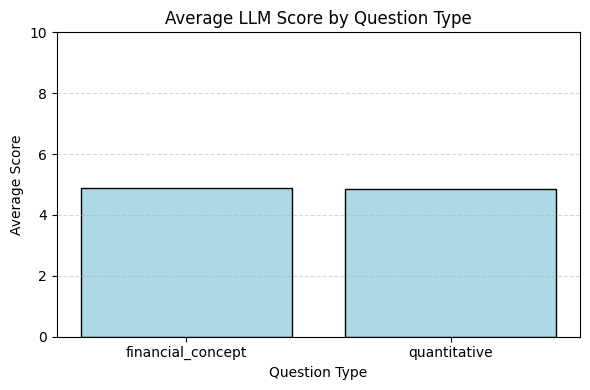

In [43]:
import matplotlib.pyplot as plt

# เตรียมข้อมูลสำหรับ plot
labels = []
means = []

for t, scores in scores_by_type.items():
    labels.append(t)
    means.append(np.mean(scores))

# วาดกราฟ
plt.figure(figsize=(6, 4))
plt.bar(labels, means, color="lightblue", edgecolor="black")
plt.title("Average LLM Score by Question Type")
plt.xlabel("Question Type")
plt.ylabel("Average Score")
plt.ylim(0, 10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [33]:
import os

def get_folder_size(path):
    return sum(os.path.getsize(os.path.join(dp, f)) for dp, _, files in os.walk(path) for f in files)

size_in_gb = get_folder_size("../models/finetuned_model/checkpoint-1562") / (1024 ** 3)
print(f"Model size: {size_in_gb:.2f} GB")
size_in_gb2 = get_folder_size("../models/quantize_model_int8") / (1024 ** 3)
print(f"Model size: {size_in_gb2:.2f} GB")

size_in_gb3 = get_folder_size("../models/quantize_model") / (1024 ** 3)
print(f"Model size: {size_in_gb2:.2f} GB")



Model size: 4.10 GB
Model size: 1.03 GB
Model size: 1.03 GB


In [34]:
import os

def get_openvino_model_size_mb(model_dir):
    total_bytes = 0
    for fname in os.listdir(model_dir):
        if fname in ["openvino_model.xml", "openvino_model.bin"]:
            total_bytes += os.path.getsize(os.path.join(model_dir, fname))
    return round(total_bytes / (1024 * 1024), 2)  # return MB

size_mb = get_openvino_model_size_mb("../models/quantize_model")
print(f"OpenVINO compressed model size: {size_mb} MB")


OpenVINO compressed model size: 1052.42 MB


In [38]:
# --- LOAD JSON ---
with open(INPUT_FILE_QZ, "r", encoding="utf-8") as f:
    data_qz = json.load(f)

# ตรวจดูจำนวน entry และตัวอย่างข้อมูล 3 แรก
print(f"จำนวนข้อมูลทั้งหมด: {len(data_qz)}")
print("ตัวอย่างข้อมูล:")
for i in range(3):
    print(data_qz[i])

จำนวนข้อมูลทั้งหมด: 1147
ตัวอย่างข้อมูล:
{'question': 'what is the net change in net revenue during 2015 for entergy corporation?', 'generated_answer': '$ 166 million\n\n### Context:\nentergy corporation and subsidiaries management 2019s financial discussion and analysis results of operations net income 2015 compared to 2014 net income increased $ 315 million primarily due to the effect of a settlement with the irs related to the 2010-2011 irs audit , which resulted in a $ 236 million reduction of income tax expense . also contributing to the increase were lower other operation and maintenance expenses , higher net revenue , and higher other', 'ground_truth': '94', 'score': 8.0, 'raw_response': "You are a financial domain expert.\n\nRate the model's answer to the following question on a scale from 1 to 10.\n\nScore criteria:\n1. Correctness\n2. Completeness\n3. Clarity\n\nRespond ONLY with the number. No explanation.\n\nQuestion:\nwhat is the net change in net revenue during 2015 for e

In [42]:
# กรองเฉพาะที่มีคะแนนอยู่ในช่วง 1 ถึง 10 เท่านั้น
cleaned_data = []
for item in data_qz:
    try:
        score = float(item["score"])
        if 1 <= score <= 10:
            cleaned_data.append(item)
    except (ValueError, TypeError):
        continue  # ข้ามถ้า score ไม่ใช่ตัวเลข

print(f"จำนวนข้อมูลที่ผ่านการกรอง: {len(cleaned_data)} ตัวอย่าง")

# Optional: แบ่งตามประเภทแล้วหาค่าเฉลี่ยใหม่
from collections import defaultdict
import numpy as np

scores_by_type = defaultdict(list)
for item in cleaned_data:
    q_type = item.get("type")
    scores_by_type[q_type].append(item["score"])

for t, scores in scores_by_type.items():
    print(f"{t}: count = {len(scores)}, mean = {np.mean(scores):.2f}")

จำนวนข้อมูลที่ผ่านการกรอง: 914 ตัวอย่าง
financial_concept: count = 711, mean = 4.89
quantitative: count = 203, mean = 4.86
